# Análisis Comparativo de la Respuesta al Ejercicio Según Género
## Práctica Personal-Carlos Pujols

Procedencia del dataset: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/data

### Carga y limpieza de datos.

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Leer el archivo CSV
df = pd.read_csv("gym_members_exercise_tracking.csv")

# Eliminar nulos
df = df.dropna()

# Eliminar duplicados
df = df.drop_duplicates()
df


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


### Agrupación por genero, calculación de caloria y conteo de tipo de ejercicio.

In [8]:
# Agrupar por 'Gender' y calcular la media de 'Calories_Burned'
analisis_por_genero = df.groupby('Gender').agg(
    Calorias_Media=('Calories_Burned', 'mean')
).reset_index()

# Imprimir el análisis por género
print(analisis_por_genero)

# Agrupar por 'Gender' y contar los tipos de workout
conteo_workouts = df.groupby('Gender')['Workout_Type'].value_counts().reset_index(name='Conteo_Workouts')

# Ordenar por mayor conteo de workouts
conteo_workouts = conteo_workouts.sort_values(by='Conteo_Workouts', ascending=False)

# Imprimir el conteo de workouts por género
print(conteo_workouts)

   Gender  Calorias_Media
0  Female      862.248918
1    Male      944.455969
   Gender Workout_Type  Conteo_Workouts
4    Male     Strength              135
5    Male         Yoga              133
6    Male       Cardio              129
0  Female       Cardio              126
1  Female     Strength              123
7    Male         HIIT              114
2  Female         HIIT              107
3  Female         Yoga              106


## Visualización de calorias medias por género.

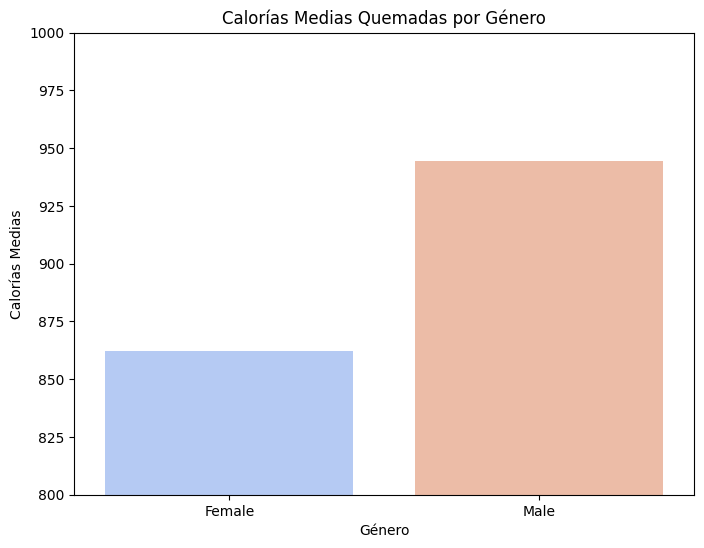

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos del análisis por género
analisis_por_genero = {
    'Gender': ['Female', 'Male'],
    'Calorias_Media': [862.248918, 944.455969]
}

# Convertir a DataFrame (opcional si ya lo tienes en pandas)
import pandas as pd
df_calorias = pd.DataFrame(analisis_por_genero)

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=df_calorias, x='Gender', y='Calorias_Media', palette='coolwarm')

# Añadir títulos y etiquetas
plt.title('Calorías Medias Quemadas por Género')
plt.xlabel('Género')
plt.ylabel('Calorías Medias')
plt.ylim(800, 1000)
plt.show()


## Visualización de calorías medias quemadas por tipo de entrenamiento y género

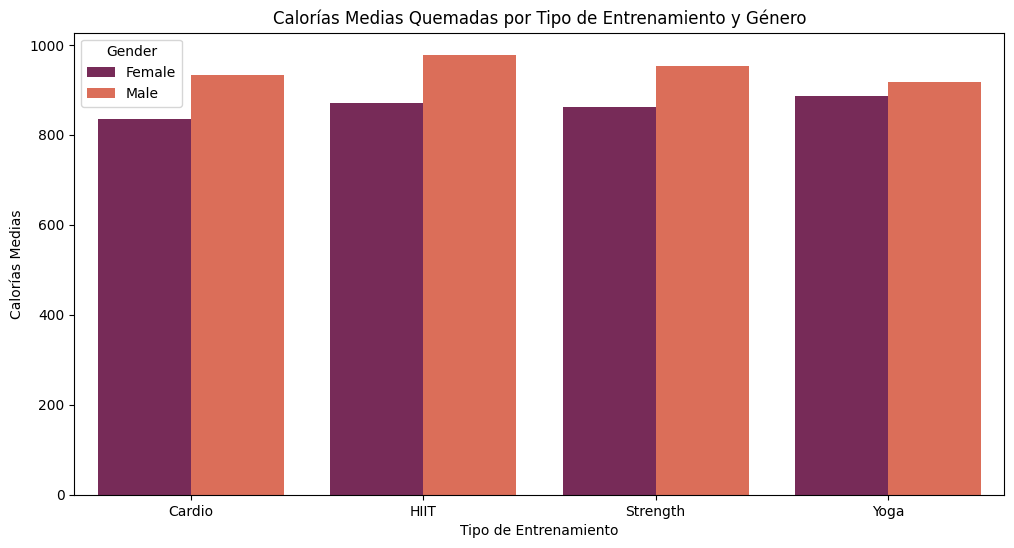

In [ ]:
# Calcular calorías medias por género y tipo de entrenamiento
calorias_por_tipo = df.groupby(['Gender', 'Workout_Type']).agg(
    Calorias_Media=('Calories_Burned', '    ')
).reset_index()

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=calorias_por_tipo, x='Workout_Type', y='Calorias_Media', hue='Gender', palette='rocket')
plt.title('Calorías Medias Quemadas por Tipo de Entrenamiento y Género')
plt.xlabel('Tipo de Entrenamiento')
plt.ylabel('Calorías Medias')
plt.show()


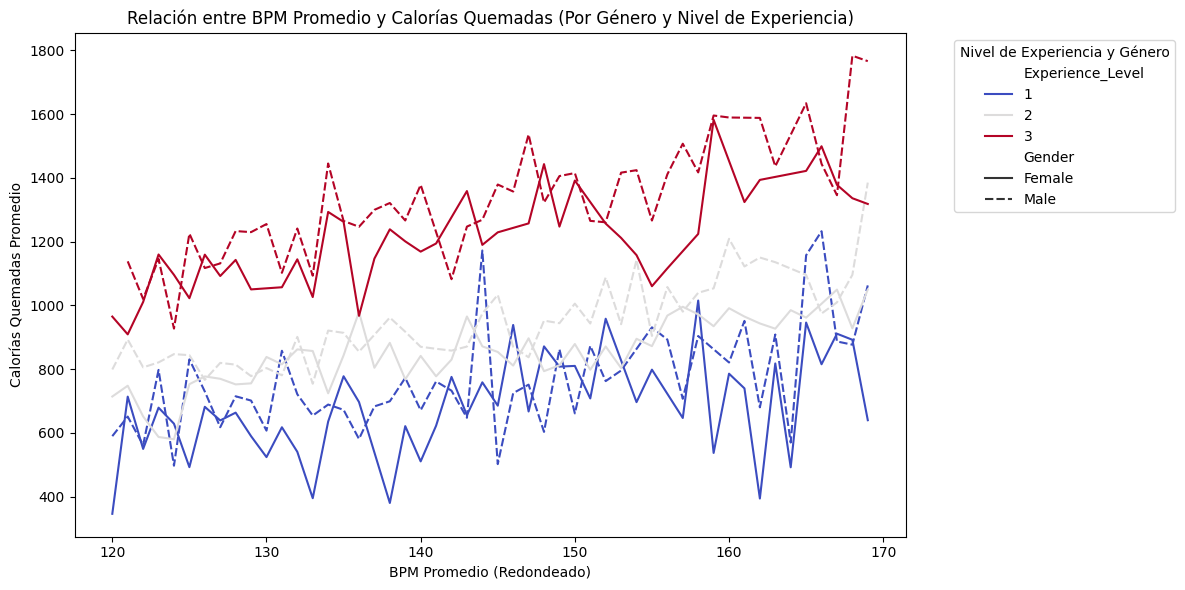

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Promediar datos por Avg_BPM_Rounded, Gender y Experience_Level
line_data_gender = df.groupby(['Avg_BPM_Rounded', 'Gender', 'Experience_Level'])['Calories_Burned'].mean().reset_index()

# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=line_data_gender,
    x='Avg_BPM_Rounded',
    y='Calories_Burned',
    hue='Experience_Level',
    style='Gender',
    palette='coolwarm',
)
plt.title('Relación entre BPM Promedio y Calorías Quemadas (Por Género y Nivel de Experiencia)')
plt.xlabel('BPM Promedio (Redondeado)')
plt.ylabel('Calorías Quemadas Promedio')
plt.legend(title='Nivel de Experiencia y Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Conclusiones sobre los resultados:
 - Los hombres queman más calorias que las mujeres en promedio,esto puede deberse a las diferencias fisiológicas como mayor masa muscular (cuanto mayor músculo más gasto calórico). Esto también se puede deber a que los hombres realizan ejercicio de mayor intensidad ( Stregth y HIIT ) respecto al sexto contrario.
 - Podemos observar que cuanta mayor experiencia , mayor calorias quemadas, puede influir que los principantes trabajen con menor intensidad respecto a los mas veteranos. 
 - Generalmente, a mayor intensidad del ejercicio, mayor es el BPM, lo que implica que el corazón late más rápido para satisfacer las mayores demandas de oxígeno y nutrientes de los músculos en actividad. Por lo tanto, a medida que aumenta el BPM promedio, también se incrementa la quema de calorías, lo que refuerza la relación entre la intensidad del ejercicio y el gasto calórico